# Pre-Masters Maths 6601PMEC

## Week 11 - Numerical Solution of Differential Equations

*  Many differential equations **cannot be solved** using analytical methods.
*  Here we discuss differential equations in the context of **initial value problems** i.e. the **differential equations** supplied with **initial conditions**.
* It is possible to obtain **approximate solutions** to such problems which may be sufficient for **engineering purposes**. However, one should **carefully use approximations** as they **can lead to incorrect results if used** in **situations outside their validity**. Thus **further analysis** of such situations are then needed. 
* Such lengthy approaches are outside the scope of this module, but we  give an introduction to particular methods used in deriving numerical solutions to differential equations.
* Most **numerical methods** can be **exploited through** the coding of software in **Python**.
* We begin with **introducing Euler’s method**.


### **Euler's Method**

Consider the **initial-value problem**
$$ \dfrac{dy}{dx} = f(x,y), \quad y = y_0 \text{ at } x = x_0$$
In general, the aim of the numerical techniques is to estimate $y$ at 
pre-determined values of $x$ i.e.
$$ x_1, x_2, ..., x_n $$
These points are usually spaced using a parameter $h$ so that
$$x_1 = x_0 + h$$
$$x_2 = x_1 + h = x_0 + 2h$$
therefore, in general
$$x_r = x_{r-1} + h = x_0 + rh$$
This quantity $h$ is called the **step size**. The aim is to produce the values
$$y_1, y_2, ..., y_n$$
where $y_n$ is the estimated value of $y$ when $x=x_n$.  
Euler’s method **approximates the solution curve in each interval**:
$$ x_0 < x < x_1, \quad x_1 < x < x_2, \text{ etc.} $$
by a straight line.  


In the figure below, the solution curve $AB$ in the interval $x_0 < x < x_1$ is **approximated** by the  line $AC$, the tangent of $A$.
<center><img src='wk11-Img1.png' width='300'></center>

Here the point $C$ has a $y$-value **very close** to $B$. Point $C$ is the point given by the tangent at $A$.
<center><img src='wk11-Img2.png' width='300'></center>

At $A(x_0, y_0)$ we can evaluate $\dfrac{dy}{dx}$ from the **differential equation**
$$ \dfrac{dy}{dx} = f(x, y) $$
The **tangent** to the solution curve at $A$ has the value of the function $f(x_0, y_0)$ as its gradient.  
The **equation of the tangent** is therefore $y-y_0 = m(x-x_0)$ thus
$$y - y_0 = f(x_0, y_0) (x-x_0)$$
At $x = x_1$ the tangent passes through the **point $C$** whose coordinate is given by
$$y_1 - y_0 = f(x_0, y_0)(x_1 - x_0)$$
or
$$y_1 = h f(x_0, y_0) + y_0$$
Then $C$ is the point $(x_1, y_1)$. Provided that $h$ is **small enough** in **relation to the rate of bending of the solution curve**, then $C$ will be close to $B$. 
Starting from $C$ we repeat the procedure to obtain
$$y_2 = y_1 + h f(x_1, y_1)$$
The point $E$ in the figure is the point $(x_2, y_2)$. The Euler formula for the **general stage** is
$$ y_{r+1} = y_r + h f(x_r, y_r)$$

**Example 1**  
Consider the initial value problem
$$ \dfrac{dy}{dx} = x + y, \quad y = 0 \text{ when } x = 0 $$
Use Euler’s method with step size $h=0.2$ to find the $y$-value when $x=1$.  
We have 
$$x_0 = 0, y_0 = 0 \quad \text{and} \quad f(x_i, y_i) = x_i + y_i$$
$$\therefore f(x_0, y_0) = x_0 + y_0 = 0$$
The step size is $h=0.2$, therefore
$$y_1 = y_0 + h f(x_0, y_0) = 0 + 0.2 \times 0$$
$$\therefore y_1 = 0$$
For the **second step**
$$y_2 = y_1 + h f(x_1, y_1) = 0 + 0.2 (0.2 + 0)$$
$$\therefore y_2 = 0.04$$
and $x_2 = x_0 + 2 h = 0 + 2 \times 0.2 = 0.4$
Therefore $(x_2, y_2)$ is $(0.4, 0.04)$.  
One can carry out **more calculations** in the same way and in $3$ **more steps** it is possible to achieve the answer for when $x=1$.  
It is therefore beneficial **to construct a table** containing information corresponding to steps in the method, as follows:  
<center><img src='wk11-Img3.png' width='400'></center>

So at $x=1$, the Euler method with step size $0.2$ gives an approximate value of $0.48832$.  
This completes the question but it is valuable to explore this further. We **can use Python to repeat the calculation**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
    return x + y

In [3]:
x = 0. # initial condition for x
y = 0. # initial condition for y
x_a = 0. #start of interval
x_b = 1. #end of interval
h = 0.2 # step size

xpoints1 = np.arange(x_a, (x_b+h), h)
ypoints1 = []

for x in xpoints1:
    ypoints1.append(y)
    y += h*f(x,y)

In [4]:
ypoints1

[0.0,
 0.0,
 0.04000000000000001,
 0.12800000000000003,
 0.27360000000000007,
 0.4883200000000001]

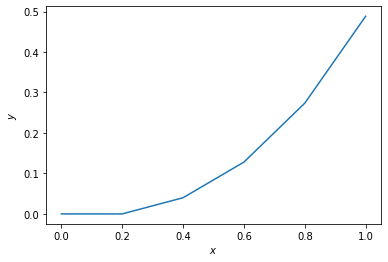

In [5]:
plt.plot(xpoints1, ypoints1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

What determines the **step size**?? Clearly we could take $h=0.1$ but we would need 10 steps to find $x=1$.  
The benefit is that this will give a **more accurate answer** as the **direction is corrected more**.

In [6]:
x = 0. # initial condition for x
y = 0. # initial condition for y
x_a = 0. #start of interval
x_b = 1. #end of interval
h = 0.1 # step size

xpoints2 = np.arange(x_a, (x_b+h), h)
ypoints2 = []

for x in xpoints2:
    ypoints2.append(y)
    y += h*f(x,y)

In [7]:
ypoints2

[0.0,
 0.0,
 0.010000000000000002,
 0.031000000000000007,
 0.06410000000000002,
 0.11051000000000002,
 0.17156100000000002,
 0.24871710000000002,
 0.34358881,
 0.45794769100000005,
 0.5937424601000001]

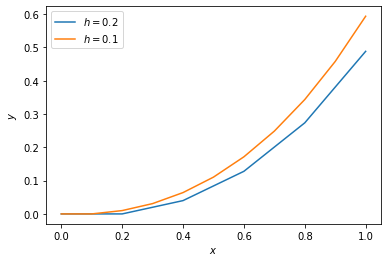

In [8]:
plt.plot(xpoints1, ypoints1, label='$h=0.2$')
plt.plot(xpoints2, ypoints2, label='$h=0.1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

The slight **drawback** is **more calculations** (10 steps).

#### **In summary:**
To apply Euler's method to the initial value problem
$$ \dfrac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$
proceed as follows.
1. Take $x_0$ and $y_0$ as the **starting values**, choose a **step size** $h$ and set $i=0$.
2. Calculate an **approximation** $y_{i+1}$ to $y(x_{i+1})$ using the formula $$y_{i+1} = y_i + h f(x_i, y_i)$$ 
3. Calculate the **corresponding $x$-coordinate** $x_{i+1}$ using the formula $$x_{i+1} = x_i + h$$
4. If further approximation values are required, increase $i$ by 1 and return to step 2.

#### **Further Use of Python**  
There are more accurate methods than Euler and these are contained in the SciPy library. We will not go into the details of the methods but simply note that the SciPy function ‘solve_ivp’ is a user-friendly method of implementing these. If you wish to know more then please view the webpage: https://docs.scipy.org/doc/scipy-1.1.0/reference/generated/scipy.integrate.solve_ivp.html.  
A basic implementation is as follows for the differential equation used above.

In [9]:
import scipy.integrate as spint

In [10]:
x = 0. # initial condition for x
y = 0. # initial condition for y
x_a = 0. #start of interval
x_b = 1. #end of interval
h = 0.1 # step size

sol1 = spint.solve_ivp(f, [x_a, x_b], [0,0], method='RK45')
sol2 = spint.solve_ivp(f, [x_a, x_b], [0,0], method='RK23')
sol3 = spint.solve_ivp(f, [x_a, x_b], [0,0], method='Radau')
sol4 = spint.solve_ivp(f, [x_a, x_b], [0,0], method='BDF')
sol5 = spint.solve_ivp(f, [x_a, x_b], [0,0], method='LSODA')

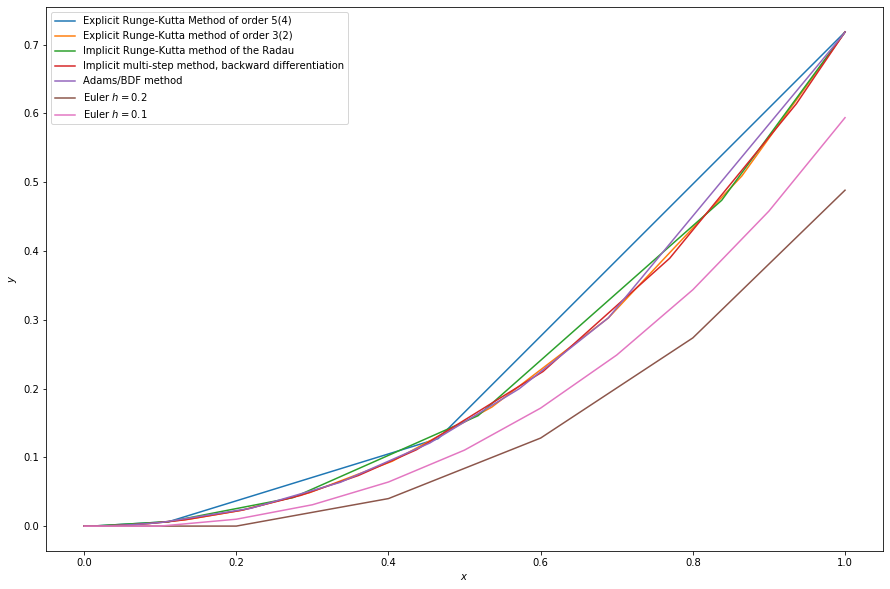

In [11]:
plt.subplots(figsize = (15,10))
plt.plot(sol1.t,sol1.y[0], label='Explicit Runge-Kutta Method of order 5(4)')
plt.plot(sol2.t,sol2.y[0], label='Explicit Runge-Kutta method of order 3(2)')
plt.plot(sol3.t,sol3.y[0], label='Implicit Runge-Kutta method of the Radau')
plt.plot(sol4.t,sol4.y[0], label='Implicit multi-step method, backward differentiation')
plt.plot(sol5.t,sol5.y[0], label='Adams/BDF method')
plt.plot()
plt.plot(xpoints1, ypoints1, label='Euler $h=0.2$')
plt.plot(xpoints2, ypoints2, label='Euler $h=0.1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

Last calculated step for each method is given below.

In [12]:
print('Explicit Runge-Kutta Method of order 5(4), 6 steps')
print(sol1.y[0][-1])
print('Explicit Runge-Kutta method of order 3(2), 13 steps')
print(sol2.y[0][-1])
print('Implicit Runge-Kutta method of the Radau, 8 steps')
print(sol3.y[0][-1])
print('Implicit multi-step method, backward differentiation, 23 steps')
print(sol4.y[0][-1])
print('Adams/BDF method, 16 steps')
print(sol5.y[0][-1])
print('Euler h=0.2, 5 steps')
print(ypoints1[-1])
print('Euler h=0.1, 10 steps')
print(ypoints2[-1])

Explicit Runge-Kutta Method of order 5(4), 6 steps
0.718288709235446
Explicit Runge-Kutta method of order 3(2), 13 steps
0.7180444479076643
Implicit Runge-Kutta method of the Radau, 8 steps
0.7182823569882655
Implicit multi-step method, backward differentiation, 23 steps
0.7184124036806754
Adams/BDF method, 16 steps
0.7183463997460449
Euler h=0.2, 5 steps
0.4883200000000001
Euler h=0.1, 10 steps
0.5937424601000001


Let us now compare these values with the exact solution below.

In [13]:
import sympy as sym

In [14]:
sym.init_printing()
x, C1 = sym.symbols('x, C1')
y = sym.Function('y')(x)
dydx = y.diff(x)

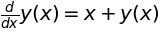

In [15]:
eq1 = sym.Eq(dydx, x + y)
eq1

In [16]:
solEq1 = sym.dsolve(eq1, y)
solEq1

In [17]:
CSol1 = sym.solve(solEq1.subs({x:0, y:0}),C1)[0]
CSol1

In [18]:
prtSol1 = solEq1.subs(C1, CSol1)
prtSol1

Therefore the exact solution at $x=1$ is

In [19]:
prtSol1.rhs.subs(x, 1)

or

In [20]:
sym.N(prtSol1.rhs.subs(x, 1))

Compare this value with the values generated by the differet methods of the solve_ivp function and it can be seen that they are in **excellent agreement** with each other.  
Now, granted some of the methods used were using more steps (with adaptive step sizing implemented) as well as fractional steps and inner iterative loops, which will increase the computational cost.

#### **Further use of Python and Higher-Order Differential Equations**  
In order to solve **second order differential equations**, we can reduce these to a **system of first order differential equations**.
  
**Example 2**  
Write the differential equation 
$$\dfrac{d^2 y}{dt^2} + 8 \dfrac{dy}{dt} + 4y = 7 \sin(t) + 3 \cos(t)$$
as a **system of first order differential equations** and find the value of $y$ when $t=1$ with the initial conditions at $t=0$, $y=1$, $\dfrac{dy}{dt} = 2$.
  
_Answer_  
Let
$$z = \dfrac{dy}{dt}$$
Then
$$\dfrac{dz}{dt} + 8z + 4y = 7 \sin(t) + 3 \cos(t)$$
This gives a **system of two first order equations**:
$$\dfrac{dy}{dt} = z$$
$$\dfrac{dz}{dt} = 7 \sin(t) + 3 \cos(t) - 8z - 4y$$
This system can be solved with the solve_ivp function.

In [21]:
import math

def f2(t, y):
    return y[1],7*math.sin(t) + 3*math.cos(t) - 8*y[1] - 4*y[0]

In [22]:
t_a = 0 #start of interval
t_b = 1 #end of interval
eg2Ans1 = spint.solve_ivp(f2, [t_a, t_b], [1, 2], method='RK45')

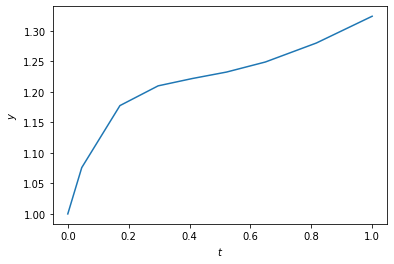

In [23]:
plt.plot(eg2Ans1.t,eg2Ans1.y[0])
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.show()

Again, this particular ODE can be solved analytically...

In [24]:
t, C1, C2 = sym.symbols('t, C1, C2')
y = sym.Function('y')(t)
dydx = y.diff(t)
dy2dx2 = y.diff(t, 2)

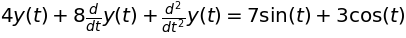

In [25]:
eq2 = sym.Eq(dy2dx2 + 8*dydx + 4*y, 7*sym.sin(t) + 3*sym.cos(t))
eq2

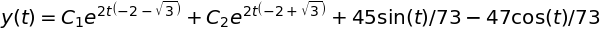

In [26]:
solEq2 = sym.dsolve(eq2, y)
solEq2

In [27]:
sim1 = solEq2.subs({t:0, y:1})
sim1

In [28]:
sim2 = sym.Eq((sym.diff(solEq2.rhs, t)).subs(t, 0), 2)
sim2

In [29]:
Csol = sym.solve([sim1,sim2], [C1, C2])
C1sol = Csol[C1]
C1sol

In [30]:
C2sol = Csol[C2]
C2sol

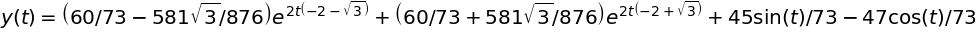

In [31]:
prtSol2 = solEq2.subs({C1: C1sol, C2: C2sol})
prtSol2

Therefore the exact solution at $t=1$ is

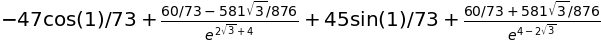

In [32]:
prtSol2.rhs.subs(t, 1)

or

In [33]:
sym.N(prtSol2.rhs.subs(t, 1))

Compare this with the value at $t=1$ from the solve_ivp function:

In [34]:
eg2Ans1.y[0][-1]

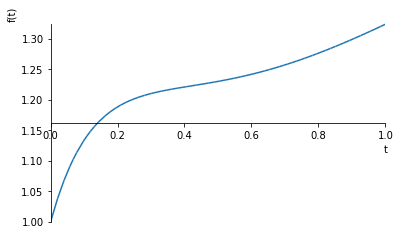

In [35]:
sym.plot(prtSol2.rhs, (t, 0, 1))

***  
  
by Dr J T Wharton

***